In [51]:
import tensorflow as tf

In [52]:
x = tf.ones(shape=(2,1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [53]:
x = tf.zeros(shape=(2,1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [54]:
x = tf.random.normal(shape=(3, 1), mean=0.,stddev=1.)
print(x)

tf.Tensor(
[[-0.8790238 ]
 [-0.04871953]
 [-1.6371583 ]], shape=(3, 1), dtype=float32)


In [55]:
x = tf.random.uniform(shape=(3, 1), minval=0.,maxval=1.)
print(x)

tf.Tensor(
[[0.5661577 ]
 [0.21328306]
 [0.75179946]], shape=(3, 1), dtype=float32)


In [56]:
import numpy as np

In [57]:
x = np.ones(shape=(2,2))
print(x)

[[1. 1.]
 [1. 1.]]


In [58]:
x[0, 0] = 0.

In [59]:
x

array([[0., 1.],
       [1., 1.]])

In [60]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3,1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.657164  ],
       [-0.38882267],
       [-0.14011396]], dtype=float32)>


In [61]:
v.assign(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [62]:
v[0,0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

In [63]:
v.assign_add(tf.ones((3,1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

In [64]:
a = tf.ones((2,2))
b = tf.square(a)
c = tf.sqrt(a)
d = b+c
e = tf.matmul(a, b)
e *= d

In [65]:
print(e)

tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


In [66]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

In [67]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

In [68]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

In [69]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(mean=[0, 3], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(mean=[3, 0], cov=[[1, 0.5], [0.5, 1]], size=num_samples_per_class)

In [70]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)


In [71]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), np.ones((num_samples_per_class, 1), dtype="float32")))

In [72]:
import matplotlib.pyplot as plt

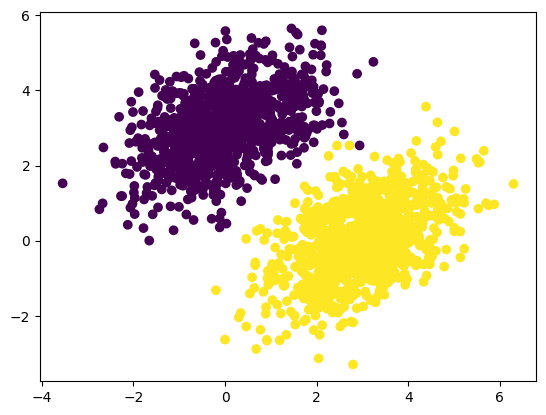

In [73]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [74]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [75]:
def model(inputs):
    return tf.matmul(inputs, W)+b

In [76]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)


In [77]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W*learning_rate)
    b.assign_sub(grad_loss_wrt_b*learning_rate)
    return loss

In [78]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f'Loss at step {step}: {loss:.4f}')

Loss at step 0: 6.8140
Loss at step 1: 1.0419
Loss at step 2: 0.2852
Loss at step 3: 0.1702
Loss at step 4: 0.1452
Loss at step 5: 0.1334
Loss at step 6: 0.1241
Loss at step 7: 0.1159
Loss at step 8: 0.1083
Loss at step 9: 0.1014
Loss at step 10: 0.0950
Loss at step 11: 0.0892
Loss at step 12: 0.0839
Loss at step 13: 0.0790
Loss at step 14: 0.0745
Loss at step 15: 0.0704
Loss at step 16: 0.0666
Loss at step 17: 0.0632
Loss at step 18: 0.0600
Loss at step 19: 0.0571
Loss at step 20: 0.0544
Loss at step 21: 0.0520
Loss at step 22: 0.0497
Loss at step 23: 0.0477
Loss at step 24: 0.0458
Loss at step 25: 0.0440
Loss at step 26: 0.0425
Loss at step 27: 0.0410
Loss at step 28: 0.0397
Loss at step 29: 0.0384
Loss at step 30: 0.0373
Loss at step 31: 0.0363
Loss at step 32: 0.0353
Loss at step 33: 0.0345
Loss at step 34: 0.0337
Loss at step 35: 0.0330
Loss at step 36: 0.0323
Loss at step 37: 0.0317
Loss at step 38: 0.0311
Loss at step 39: 0.0306


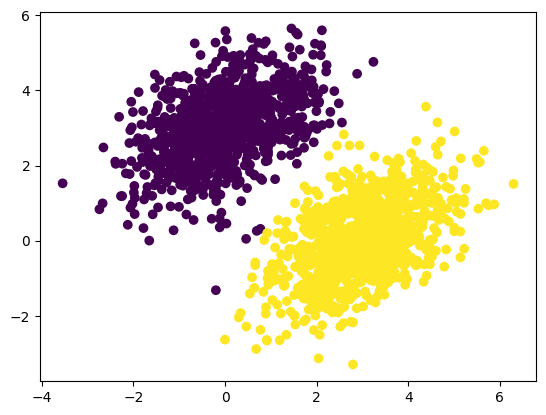

In [79]:
predictions = model(inputs)
plt.scatter(inputs[:,0], inputs[:,1], c=predictions[:, 0]>0.5)
plt.show()

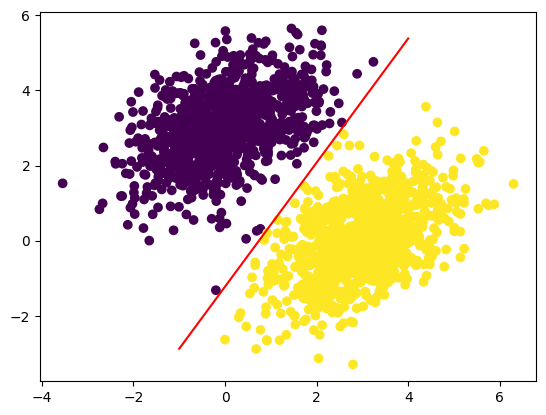

In [80]:
x = np.linspace(-1, 4, 100)
y = -W[0]/W[1]*x+(0.5-b)/W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:,0], inputs[:, 1], c=predictions[:, 0]>0.5)

In [81]:
from tensorflow import keras

In [82]:
class SimpleDense(keras.layers.Layer):
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units), initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,), initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [83]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)


(2, 32)


In [84]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [85]:
layer = layers.Dense(32, activation="relu")

In [86]:
# model = models.Sequential([
#     layers.Dense(32, activation="relu"),
#     layers.Dense(32)
# ])

In [87]:
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10, activation="softmax")
])

In [88]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop", loss="mean_squared_error", metrics=["accuracy"])

In [89]:
history = model.fit(inputs, targets, epochs=5, batch_size=128)

Epoch 1/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.5287 - loss: 16.4082
Epoch 2/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.5510 - loss: 15.9536
Epoch 3/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.5361 - loss: 15.7223
Epoch 4/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 936us/step - accuracy: 0.5267 - loss: 14.0586
Epoch 5/5
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5248 - loss: 14.1937 


In [90]:
history.history

{'accuracy': [0.5285000205039978,
  0.531000018119812,
  0.531000018119812,
  0.5320000052452087,
  0.5320000052452087],
 'loss': [16.211076736450195,
  15.565296173095703,
  15.018756866455078,
  14.484772682189941,
  13.968140602111816]}

In [91]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - binary_accuracy: 0.9707 - loss: 1.2871 - val_binary_accuracy: 0.9817 - val_loss: 0.0634
Epoch 2/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9547 - loss: 0.0721 - val_binary_accuracy: 0.9983 - val_loss: 0.0358
Epoch 3/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9624 - loss: 0.0642 - val_binary_accuracy: 0.9983 - val_loss: 0.0700
Epoch 4/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.9638 - loss: 0.0668 - val_binary_accuracy: 0.9967 - val_loss: 0.0322
Epoch 5/5
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_accuracy: 0.9577 - loss: 0.0673 - val_binary_accuracy: 0.8233 - val_loss: 0.1510


In [92]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
[[0.36653656]
 [0.615641  ]
 [0.24551952]
 [0.61226845]
 [1.0823593 ]
 [1.4638305 ]
 [0.51546115]
 [1.2355232 ]
 [0.2914039 ]
 [1.1736455 ]]
